<a href="https://colab.research.google.com/github/Sinudeshmukh/Data-Science/blob/main/SentimentAnalysisAssgn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import string
import spacy
from wordcloud import WordCloud

In [5]:
df = pd.read_csv('Elon_musk.csv',error_bad_lines=False,sep=',',encoding='cp1252')

In [6]:
df

,Unnamed: 0,text
0,1,@kunalb11 I’m an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [7]:
df = df.drop(columns=['Unnamed: 0'],axis=1)

In [8]:
df

,text
0,@kunalb11 I’m an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


##Data Cleaning

In [9]:
import re     #regular expression
import string

In [10]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    return text

clean = lambda x: clean_text(x)


In [11]:
df['text'] = df.text.apply(clean)

In [12]:
df['text']

0                                             im an alien
1       idaacarmack ray tracing on cyberpunk with hdr ...
2                        joerogan spotify great interview
3                                  doge is underestimated
4       teslacn congratulations tesla china for amazin...
                              ...                        
1994    flcnhvy true it sounds so surreal but the nega...
1995    ppathole make sure to read ur terms amp condit...
1996                    teslagong ppathole samwise gamgee
1997                   ppathole altho dumb and dumber is 
1998                              progress update august 
Name: text, Length: 1999, dtype: object

In [13]:
dataset = df.copy()

###Remove Spaces and empty strings

In [14]:
#remove both the leading and the trailing characters
df = [x.strip() for x in df.text]

In [15]:
# removes empty strings
df = [x for x in df if x]

In [16]:
df[0:10]

['im an alien',
 'idaacarmack ray tracing on cyberpunk with hdr is nextlevel have you tried it',
 'joerogan spotify great interview',
 'doge is underestimated',
 'teslacn congratulations tesla china for amazing execution last year now on to the next for even more',
 'happy new year of the ox',
 'frodo was the underdoge\nall thought he would fail\nhimself most of all httpstcozgxjfdzzrm',
 'owensparks flcnhvy  haha thanks',
 'flcnhvy  indeed tweets definitely do not represent realworld time allocation',
 'the most entertaining outcome is the most likely']

In [17]:
#Joining the list into one string
text = ' '.join(df)
text

'im an alien idaacarmack ray tracing on cyberpunk with hdr is nextlevel have you tried it joerogan spotify great interview doge is underestimated teslacn congratulations tesla china for amazing execution last year now on to the next for even more happy new year of the ox frodo was the underdoge\nall thought he would fail\nhimself most of all httpstcozgxjfdzzrm owensparks flcnhvy  haha thanks flcnhvy  indeed tweets definitely do not represent realworld time allocation the most entertaining outcome is the most likely givedirectly just sent some just agree to do clubhouse with kanyewest geoffkeighley unrealengine its getting real bought some dogecoin for lil x so he can be a toddler hodler joshmanmode he definitely has issues but the sentencing seems a bit high freewalletorg thanks for fixing freewalletorg please unlock my account astrojordy this is true power haha freewalletorg any crypto wallet that wont give you your private keys should be avoided at all costs freewalletorg your app su

###Part of Speech Tagging

In [18]:
nlp = spacy.load('en_core_web_sm')

text1 = nlp(text)
spacy.displacy.render(text1,style='ent', jupyter=True)

In [19]:
for token in text1[0:50]:
    print(token, token.pos_)

i PRON
m VERB
an DET
alien ADJ
idaacarmack ADJ
ray NOUN
tracing VERB
on ADP
cyberpunk PROPN
with ADP
hdr PROPN
is AUX
nextlevel ADJ
have AUX
you PRON
tried VERB
it PRON
joerogan PROPN
spotify VERB
great ADJ
interview NOUN
doge VERB
is AUX
underestimated VERB
teslacn NOUN
congratulations NOUN
tesla PROPN
china PROPN
for ADP
amazing ADJ
execution NOUN
last ADJ
year NOUN
now ADV
on ADP
to ADP
the DET
next ADJ
for ADP
even ADV
more ADV
happy ADJ
new ADJ
year NOUN
of ADP
the DET
ox PROPN
frodo PROPN
was AUX
the DET


In [20]:
#Filtering for nouns and verbs only
nouns_verbs = [token.text for token in text1 if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[10:50])

['execution', 'year', 'year', 'thought', 'would', 'fail', 'httpstcozgxjfdzzrm', 'owensparks', 'thanks', 'tweets', 'represent', 'realworld', 'time', 'allocation', 'outcome', 'sent', 'agree', 'clubhouse', 'getting', 'bought', 'dogecoin', 'lil', 'can', 'toddler', 'hodler', 'issues', 'sentencing', 'seems', 'bit', 'freewalletorg', 'thanks', 'fixing', 'freewalletorg', 'unlock', 'account', 'astrojordy', 'power', 'haha', 'freewalletorg', 'wallet']


###Counting Tokens

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [22]:
X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']

wf_df[0:10]

,word,count
0,will,165
1,amp,125
2,ppathole,76
3,spacex,57
4,should,49
5,launch,48
6,can,43
7,would,41
8,wholemarsblog,40
9,make,33


###Visualizing

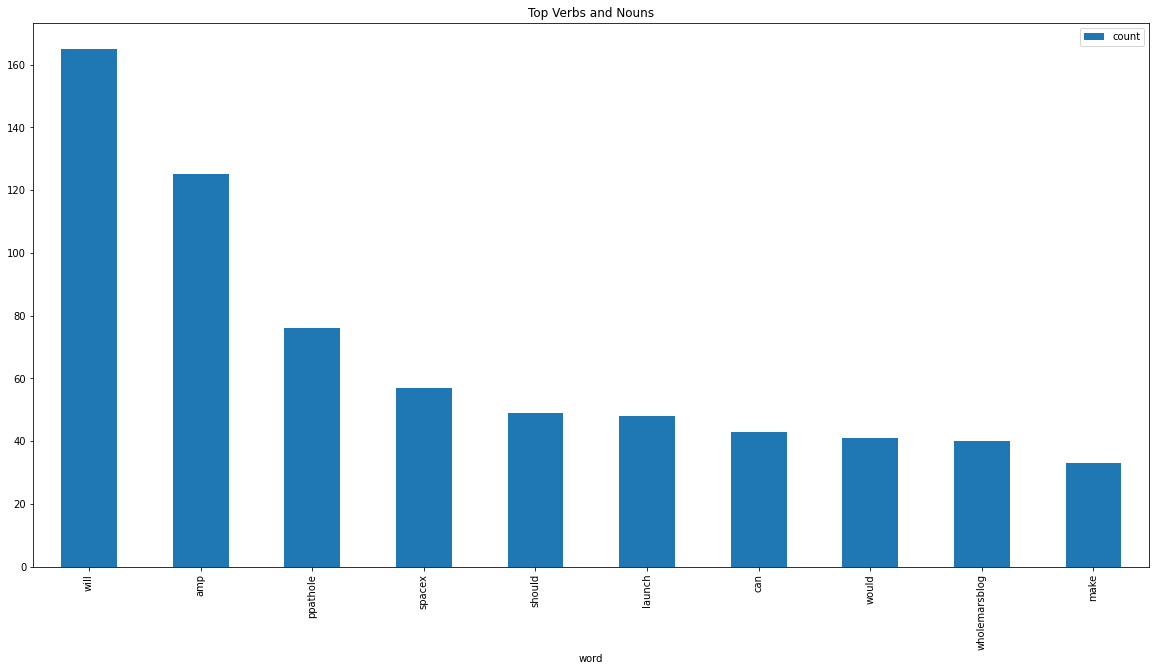

In [23]:
#Barchart for top 10 nouns + verbs
wf_df[0:10].plot.bar(x='word', figsize=(20,10), title='Top Verbs and Nouns')

#Sentiment Analysis

In [24]:
afinn = pd.read_csv('Afinn.csv',sep=',',encoding='latin-1')
afinn.shape

(2477, 2)

In [25]:
afinn.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [26]:
import nltk 
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [27]:
from nltk import tokenize
sentence = tokenize.sent_tokenize(" ".join(df))
sentence[0:10]

['im an alien idaacarmack ray tracing on cyberpunk with hdr is nextlevel have you tried it joerogan spotify great interview doge is underestimated teslacn congratulations tesla china for amazing execution last year now on to the next for even more happy new year of the ox frodo was the underdoge\nall thought he would fail\nhimself most of all httpstcozgxjfdzzrm owensparks flcnhvy  haha thanks flcnhvy  indeed tweets definitely do not represent realworld time allocation the most entertaining outcome is the most likely givedirectly just sent some just agree to do clubhouse with kanyewest geoffkeighley unrealengine its getting real bought some dogecoin for lil x so he can be a toddler hodler joshmanmode he definitely has issues but the sentencing seems a bit high freewalletorg thanks for fixing freewalletorg please unlock my account astrojordy this is true power haha freewalletorg any crypto wallet that wont give you your private keys should be avoided at all costs freewalletorg your app s

In [28]:
dataset

,text
0,im an alien
1,idaacarmack ray tracing on cyberpunk with hdr ...
2,joerogan spotify great interview
3,doge is underestimated
4,teslacn congratulations tesla china for amazin...
...,...
1994,flcnhvy true it sounds so surreal but the nega...
1995,ppathole make sure to read ur terms amp condit...
1996,teslagong ppathole samwise gamgee
1997,ppathole altho dumb and dumber is


In [29]:
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [30]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [31]:
dataset['sentiment_value'] = dataset['text'].apply(calculate_sentiment)

In [32]:
dataset

,text,sentiment_value
0,im an alien,0
1,idaacarmack ray tracing on cyberpunk with hdr ...,0
2,joerogan spotify great interview,3
3,doge is underestimated,-1
4,teslacn congratulations tesla china for amazin...,6
...,...,...
1994,flcnhvy true it sounds so surreal but the nega...,-3
1995,ppathole make sure to read ur terms amp condit...,1
1996,teslagong ppathole samwise gamgee,0
1997,ppathole altho dumb and dumber is,-6


##High Sentiment Tweets

In [33]:
dataset.sort_values(by='sentiment_value').tail(20)

,text,sentiment_value
824,futurejurvetson ppathole super appreciate your...,7
496,erdayastronaut spacex did great even reaching...,7
421,to tesla owners taking delivery in the final d...,7
298,techreview and increase fun hopefully,7
1582,teslaownerssv erdayastronaut not perfectly at ...,7
1608,teslarati aiming to make it super fun,7
1420,nextspaceflight good chance something will sli...,7
1590,teslarati the rate of improvement from origin...,7
462,pcgamer but it is visually stunning amp playab...,7
543,lrocket thanks for everything you did to help ...,7


##Low Sentiment Tweets

In [34]:
dataset.sort_values(by='sentiment_value').head(20)

,text,sentiment_value
186,naval also the road to hell is mostly paved w...,-7
1273,tjlk there are some eerie parallels between th...,-6
1997,ppathole altho dumb and dumber is,-6
1717,neuroskeptic they dont fire all at once some g...,-6
1063,tesladri chananbos wholemarsblog the crash ab...,-5
1393,lvaux kulpability tlowdon ethicalskeptic peopl...,-5
1533,ppathole the early investor part of tesla is w...,-5
1574,universalsci asteroid impact risk is well unde...,-5
1975,rationaletienne flcnhvy ppathole ihearttesla d...,-5
42,univercurious extremely misleading image as do...,-5


##Sentiment Scores of All tweets

In [35]:
dataset['sentiment_value'].describe()

count    1999.000000
mean        0.737369
std         1.820954
min        -7.000000
25%         0.000000
50%         0.000000
75%         2.000000
max        12.000000
Name: sentiment_value, dtype: float64

##Sentiments with Top Scores

In [36]:
dataset[dataset['sentiment_value']>=10]

,text,sentiment_value
458,teslaownerssv it will get absurdly good tesla ...,10
468,picotjohn cyberpunkgame its a good to great ga...,10
1172,thanks tesla team for great work on deliveries...,10
1304,one way or another excitement guaranteed suppo...,10
1357,great trip to germany support from government ...,10
1388,gerberkawasaki wow i super loved astronomy but...,12


##Sentiment with Worst Scores

In [40]:
dataset[dataset['sentiment_value']<=-5].tail()

,text,sentiment_value
1533,ppathole the early investor part of tesla is w...,-5
1574,universalsci asteroid impact risk is well unde...,-5
1717,neuroskeptic they dont fire all at once some g...,-6
1975,rationaletienne flcnhvy ppathole ihearttesla d...,-5
1997,ppathole altho dumb and dumber is,-6


##Visualization on Sentiment value

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


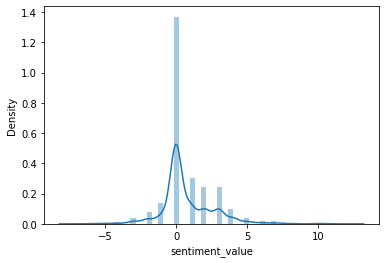

In [41]:
sns.distplot(dataset['sentiment_value'])

In [42]:
dataset['index'] = range(0,len(dataset))

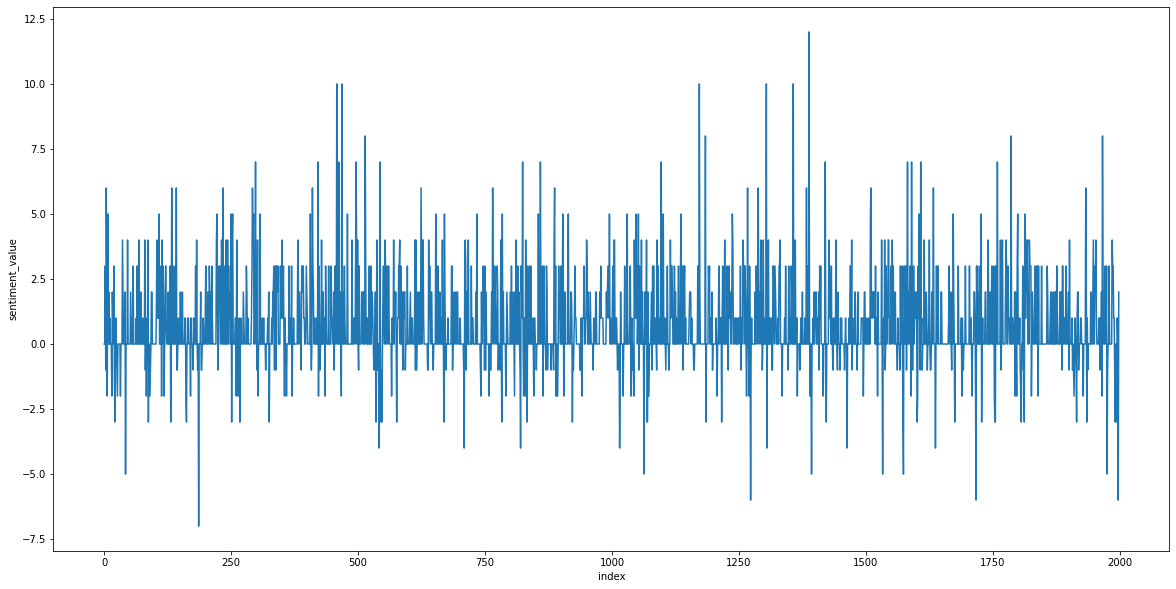

In [44]:
plt.figure(figsize=(20,10))
sns.lineplot(y='sentiment_value',x='index',data=dataset)

##Sentiment Value to Word Count

In [47]:
dataset['word_count'] = dataset['text'].str.split().apply(len)

In [48]:
dataset['word_count'].head()

0     3
1    13
2     4
3     3
4    17
Name: word_count, dtype: int64

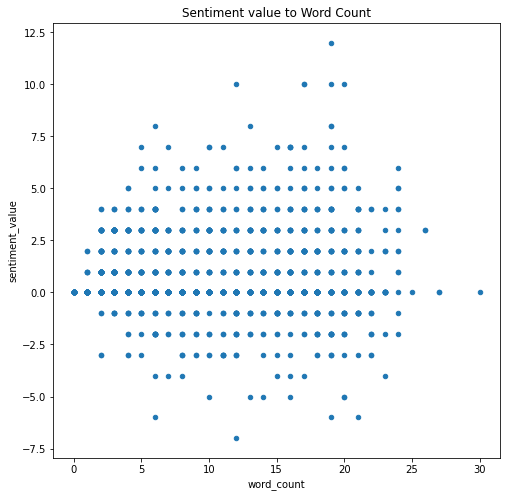

In [50]:
dataset.plot.scatter(x='word_count',y='sentiment_value',figsize=(8,8),title='Sentiment value to Word Count')

##We can see that as word count increases sentiment value as inceases in some Amount.